In [19]:
%load_ext autoreload
%autoreload 2
from sensitivity_analysis_2_0 import sensitivity_analysis
from TOPSIS_main_data_processing import TOPSIS_main_data_processing
from TOPSIS_plotting_results_function import results_visualization_topsis
from gathering_data_function import gathering_data
from TOPSIS_saving_results_function import directory_creation, save_run_results, save_sensitivity_results

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


The following code snippet run a function that gathers all the necessary data to run the simulation.

1. Loads the Excel or CSV file into a dataframe.
2. User defines the beneficial or non-beneficial nature of all criteria.
3. User assigns a weight (1-10) for each criterion.
4. Normalizes the weights.

Argument:
    file_path (str) : path of the Excel or CSV file.

Returns:
    decision_matrix (dataframe) : data array containing all the alternatives and their evaluations for each criterion.
    data_filename (str) : name of the file.
    weights (dict) : 

In [9]:
decision_matrix, data_filename, weights, normalized_weights, beneficial_criteria, non_beneficial_criteria = gathering_data(
    'C:/Users/Virgi/OneDrive/Bureau/MODM_tool_project/TOPSIS/data_input/mock_data.csv')

              Price ($)  Storage (GB)  Camera (MP)  Looks (1-5)
Alternative                                                    
Phone 1             250            16           12            5
Phone 2             200            16            8            3
Phone 3             300            32           16            4
Phone 4             275            32            8            4
Phone 5             225            16           16            2


The following code snippet asks the user if he wants to save the results of the run and creates a new directory in the folder 'results' is the answer is 'yes'.

In [10]:
user_input = input(
    "Do you want to save the results of this run? (yes/no): ").strip().lower()
directory = None
if user_input == 'yes':
    directory = directory_creation(data_filename)

The following code snippet processes the main calculations of the TOPSIS method.

In [11]:
ranked_alternatives, ranks, weighted_normalized_matrix, S = TOPSIS_main_data_processing(
    decision_matrix, normalized_weights, beneficial_criteria)

The following code snippet plots the results of the run


Ranked Alternatives:
Alternative
Phone 3    0.604086
Phone 4    0.546737
Phone 5    0.441024
Phone 2    0.395914
Phone 1    0.363947
dtype: float64


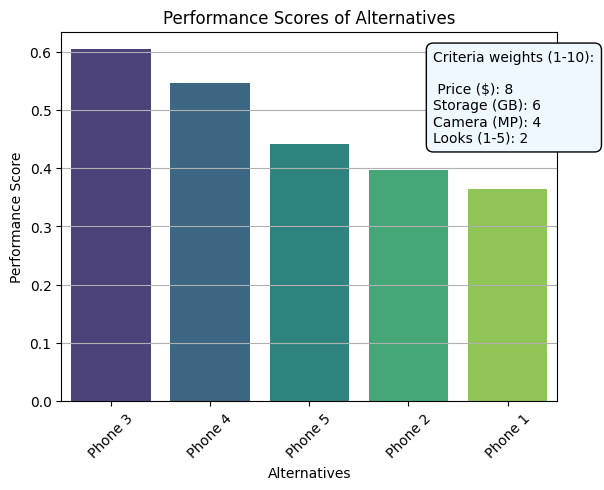

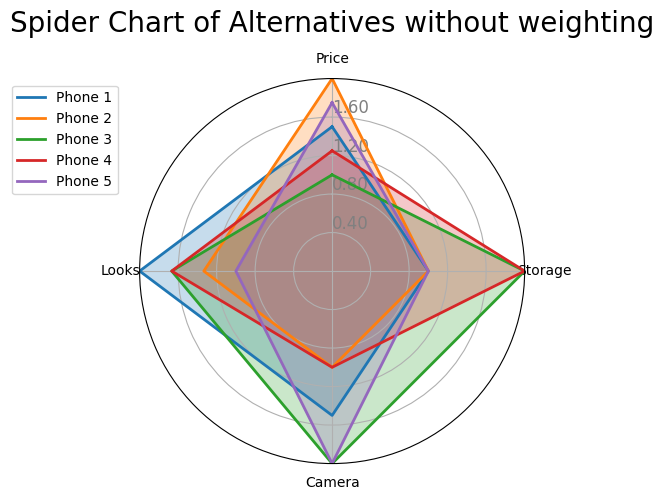

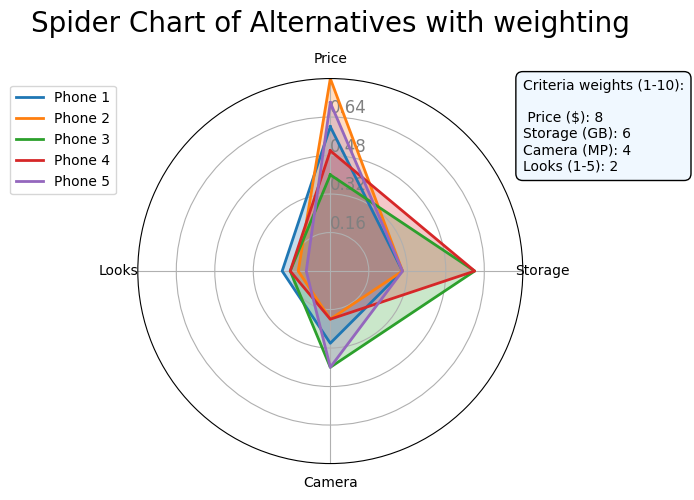

In [20]:
results_visualization_topsis(
    ranked_alternatives,
    weighted_normalized_matrix,
    beneficial_criteria,
    weights,
    normalized_weights,
    S,
    user_input,
    directory,
    decision_matrix)

Initial weight for  Price ($): 8
Initial weight for Storage (GB): 6
Initial weight for Camera (MP): 4
Initial weight for Looks (1-5): 2


100%|██████████| 1500/1500 [00:03<00:00, 458.83it/s]


Phone 3
99.07


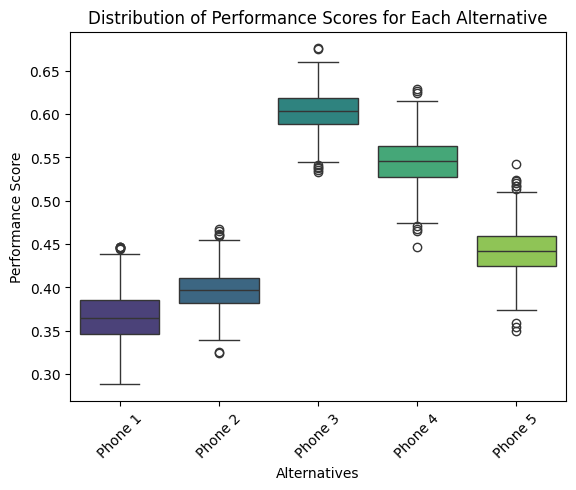

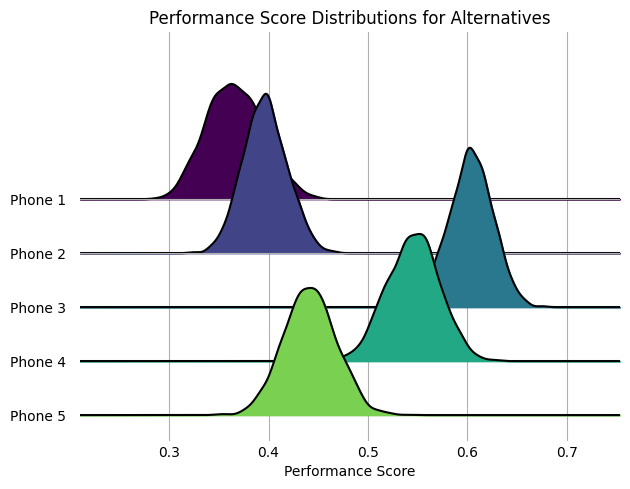

In [16]:
user_input2 = input(
    "Do you want to run a sensitivity analysis? (yes/no): ").strip().lower()
if user_input2 == 'yes':
    uncertainties, scores_df, ranks_df, reliability_percentage, initial_best_solution = sensitivity_analysis(
        TOPSIS_main_data_processing, weights, 10000, 0, 10, decision_matrix, beneficial_criteria, S, user_input, directory)

The following code snippet saves the results

In [17]:
if user_input == 'yes':
    save_run_results(
        directory,
        decision_matrix,
        weighted_normalized_matrix,
        ranked_alternatives,
        weights,
        beneficial_criteria,
        non_beneficial_criteria,
    )
    
if user_input2 == 'yes' and user_input == 'yes':
    save_sensitivity_results(
        directory,
        uncertainties,
        scores_df,
        ranks_df,
        reliability_percentage,
        initial_best_solution)